<a href="https://colab.research.google.com/github/kannursaya/ML_Algorithms/blob/main/ml_linear1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the Data: (20640, 10)
Data types:
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object
Missing Values per Column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


/tmp/ipython-input-3-1774198513.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


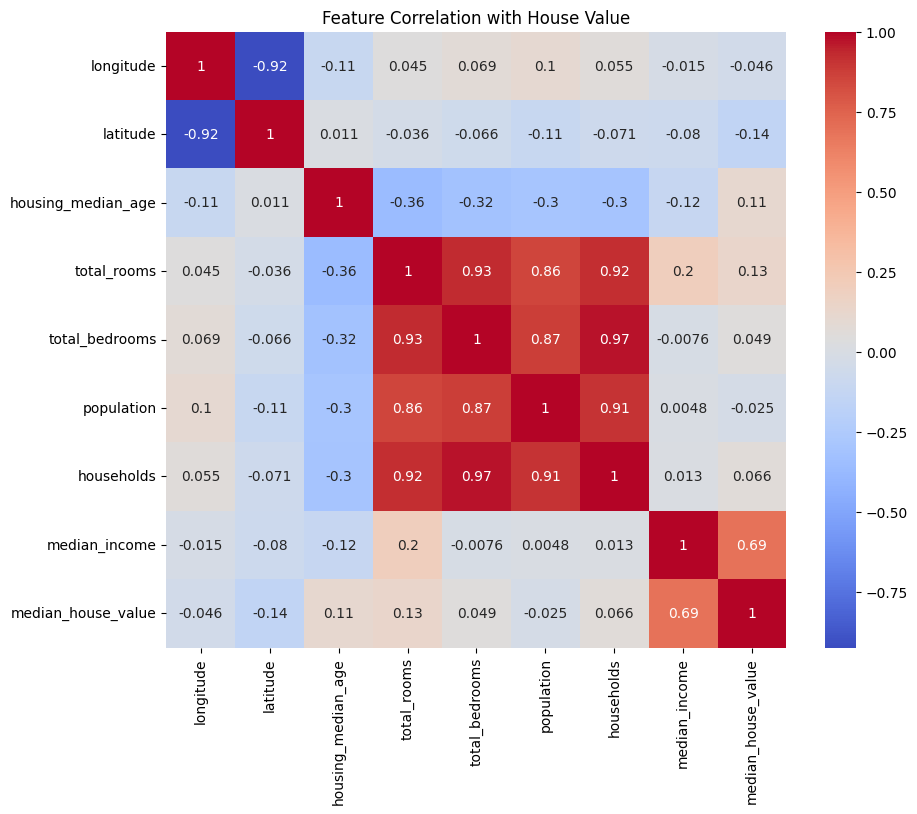

MSE:7718701727.13
RMSE:59736.68
R2 Score:0.41


In [3]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
df.head()

#EDA
print("Shape of the Data:", df.shape)
print("Data types:")
print(df.dtypes)

print("Missing Values per Column:")
print(df.isnull().sum())
df.describe()
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation with House Value")
plt.show()

features = df[[
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income'
]]
target = df['median_house_value']
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
features = df[[
    'median_income',
    'housing_median_age',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household'
]]

#training the model
from sklearn.model_selection import train_test_split
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE:{mse:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"R2 Score:{r2:.2f}")